202101544 마영준

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [26]:
batch_size = 256
learning_rate = 0.01
num_epoch = 10

In [20]:
#mnist_train = dset.MNIST("../", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_train = dset.FashionMNIST('~/.pytorch/F_MNIST_data/', train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.FashionMNIST('~/.pytorch/F_MNIST_data/', train=False, transform=transforms.ToTensor(), target_transform=None, download=True) 

train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)


Extracting C:\Users\82105/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\82105/.pytorch/F_MNIST_data/FashionMNIST\raw




Extracting C:\Users\82105/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\82105/.pytorch/F_MNIST_data/FashionMNIST\raw




Extracting C:\Users\82105/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\82105/.pytorch/F_MNIST_data/FashionMNIST\raw




Extracting C:\Users\82105/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\82105/.pytorch/F_MNIST_data/FashionMNIST\raw



In [21]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(1,16,5),
            nn.ReLU(),
            nn.Conv2d(16,32,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(64*3*3, 100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
    
    def forward(self,x):
        out = self.layer(x)
        out = out.view(batch_size,-1)
        out = self.fc_layer(out)
        return out


In [27]:
device = torch.device("cpu")
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [28]:
loss_arr = []
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3074, grad_fn=<NllLossBackward0>)
tensor(0.3709, grad_fn=<NllLossBackward0>)
tensor(0.4486, grad_fn=<NllLossBackward0>)
tensor(0.3590, grad_fn=<NllLossBackward0>)
tensor(0.3103, grad_fn=<NllLossBackward0>)
tensor(0.2100, grad_fn=<NllLossBackward0>)
tensor(0.2202, grad_fn=<NllLossBackward0>)
tensor(0.2384, grad_fn=<NllLossBackward0>)
tensor(0.2941, grad_fn=<NllLossBackward0>)
tensor(0.1999, grad_fn=<NllLossBackward0>)


In [29]:
correct = 0
total = 0

with torch.no_grad():
    for image,label in test_loader:
        x = image.to(device)
        y_ = label.to(device)
        
        output = model.forward(x)
        _,output_index = torch.max(output,1)
        
        total += label.size(0)
        correct += (output_index == y_).sum().float()
    print("Accurancy of Test Data: {}".format(100*correct/total))

Accurancy of Test Data: 90.7885971069336


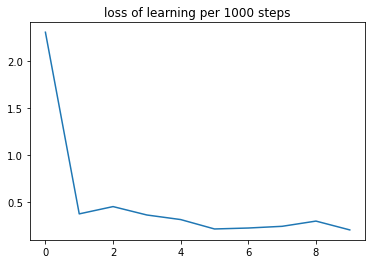

In [30]:
import matplotlib.pyplot as plt

plt.title('loss of learning per 1000 steps')
#for idx, x in enumerate(loss_arr):
#    plt.plot(idx+1, x)
plt.plot(loss_arr)

202101544 마영준